In [4]:
# Import libraries

import pandas as pd
import numpy as np
import random as rnd
import sklearn as skl
import seaborn as sn
import matplotlib.pyplot as plt
import sympy as sp
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, silhouette_score
from scipy.stats import chi2_contingency
import warnings
from IPython.display import display, Math
from pickle import dump

warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.3f}'.format
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
# Import data
dfHousing_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=439&path=housing.csv")

In [6]:
# Data inspection

print(dfHousing_raw.shape)
print(dfHousing_raw.info())

# Verify duplicates and NANs

if dfHousing_raw.duplicated().any().any():
    dfHousing_raw = dfHousing_raw.drop_duplicates()

if dfHousing_raw.isna().any().any():
    dfHousing_raw = dfHousing_raw.dropna()

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [7]:
# Removing package_name column as it is not relevant for the analysis
dfHousing_processed = dfHousing_raw[["MedInc","Latitude","Longitude"]]

In [9]:
# Normalize data
X = dfHousing_processed
Xnorm = (X - X.mean())/(X.std())

# Split data
X_train, X_test = train_test_split(Xnorm, random_state = 42, train_size = 0.7)

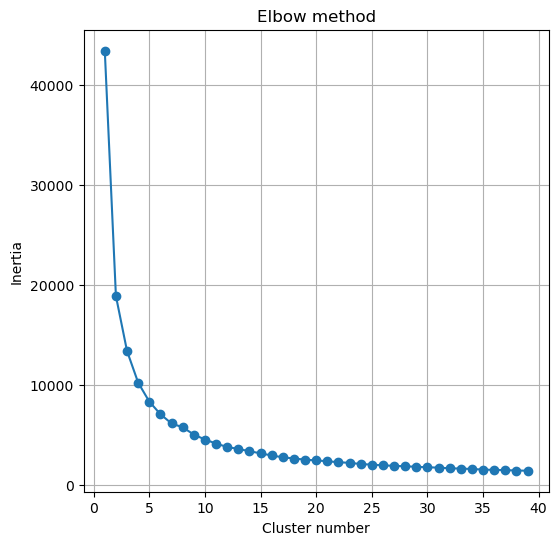

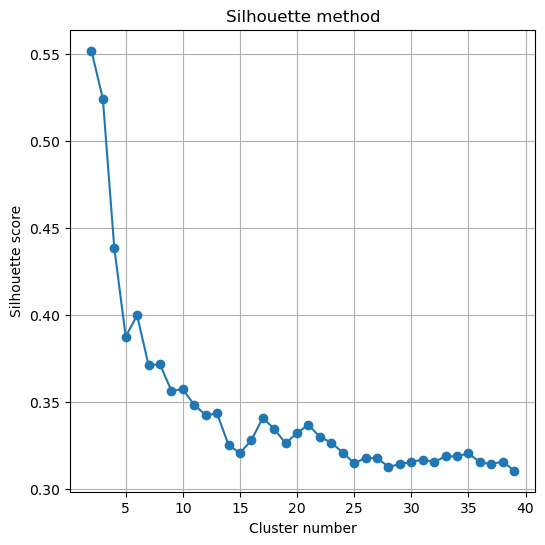

In [10]:
## Check best number of clusters for the model

# Elbow method

nk = []

for k in range(1,40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_train)
    nk.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(6, 6))
plt.plot(range(1, 40), nk, marker='o')
plt.title('Elbow method')
plt.xlabel('Cluster number')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Silhouette score

ss = []
for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(X_train)

    X_prediction = kmeans.predict(X_test)
    silhouette_avg = silhouette_score(X_test, X_prediction)
    ss.append(silhouette_avg)

# Gráfico del silhouette
plt.figure(figsize=(6, 6))
plt.plot(range(2, 40), ss, marker='o')
plt.title('Silhouette method')
plt.xlabel('Cluster number')
plt.ylabel('Silhouette score')
plt.grid()
plt.show();

In [59]:
# K-means clustering

best_cluster_number = 6  # From previous analysis

housing_model = KMeans(n_clusters = best_cluster_number, random_state = 42)
housing_model.fit(X_train)

# Add cluster to dataframe
ypred_train        = housing_model.predict(X_train)
X_train["Cluster"] = ypred_train

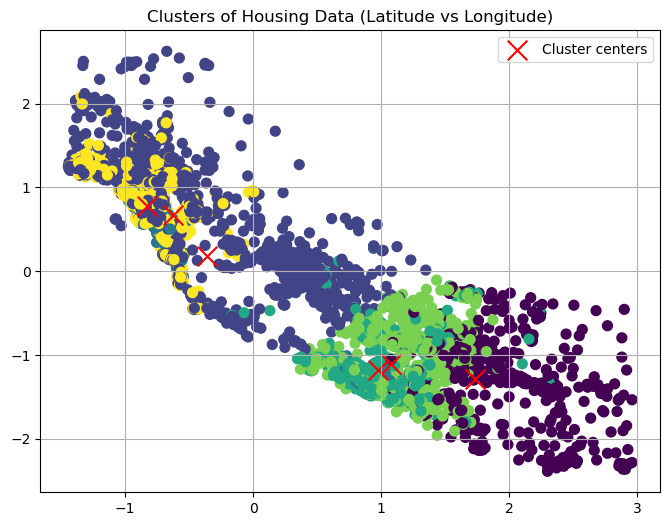

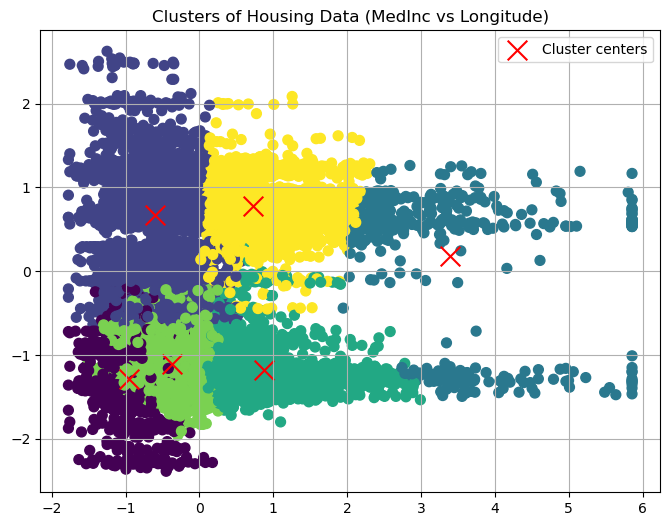

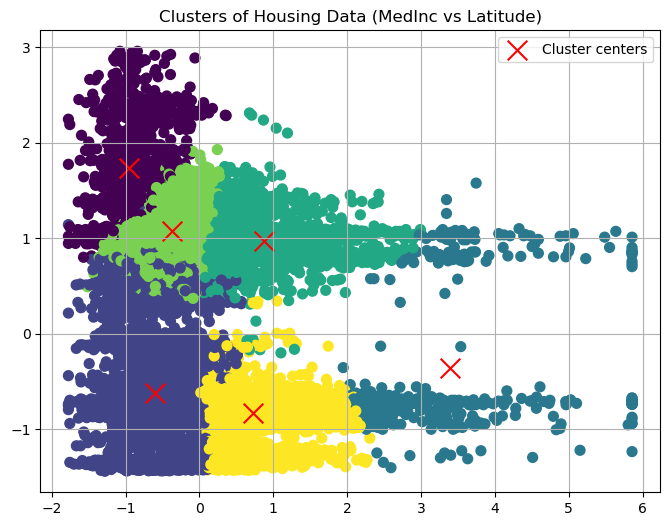

In [35]:
## Cluster visualization (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Latitude'], X_train['Longitude'], c=X_train['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 1], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (Latitude vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['MedInc'], X_train['Longitude'], c=X_train['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Latitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['MedInc'], X_train['Latitude'], c=X_train['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Latitude)')
plt.grid()
plt.show()

In [60]:
# Perform prediction
ypred_test = housing_model.predict(X_test)
X_test["Cluster"] = ypred_test

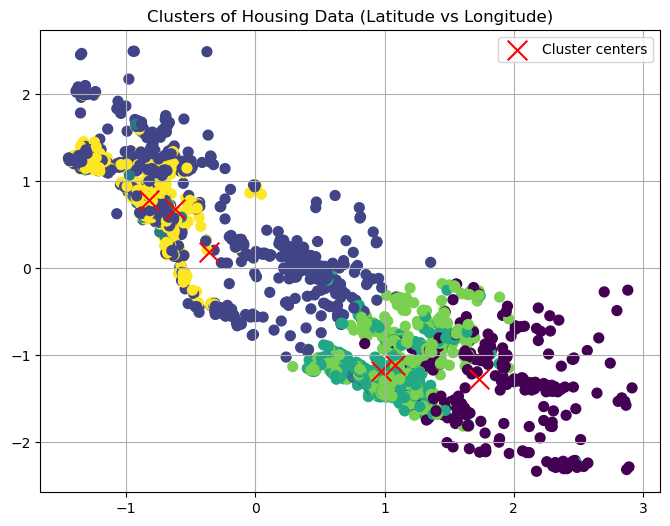

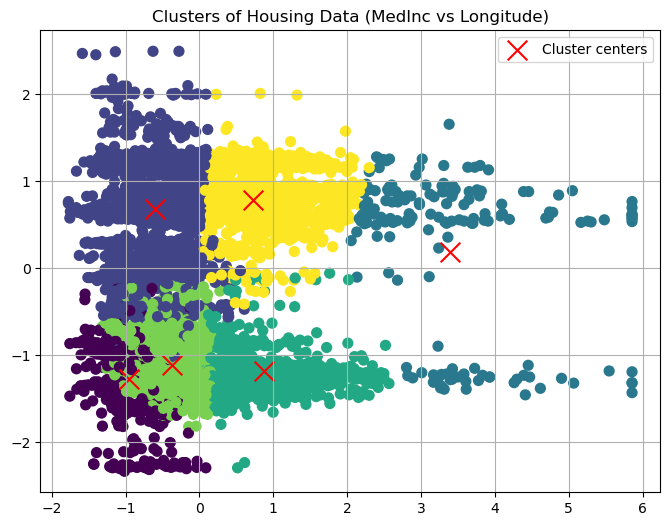

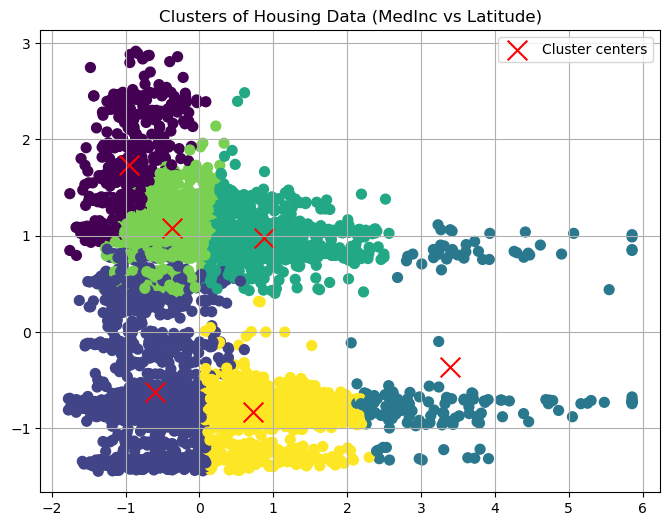

In [39]:
## Cluster visualization (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['Latitude'], X_test['Longitude'], c=X_test['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 1], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (Latitude vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['MedInc'], X_test['Longitude'], c=X_test['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Latitude)
plt.figure(figsize=(8, 6))
plt.scatter(X_test['MedInc'], X_test['Latitude'], c=X_test['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Latitude)')
plt.grid()
plt.show()

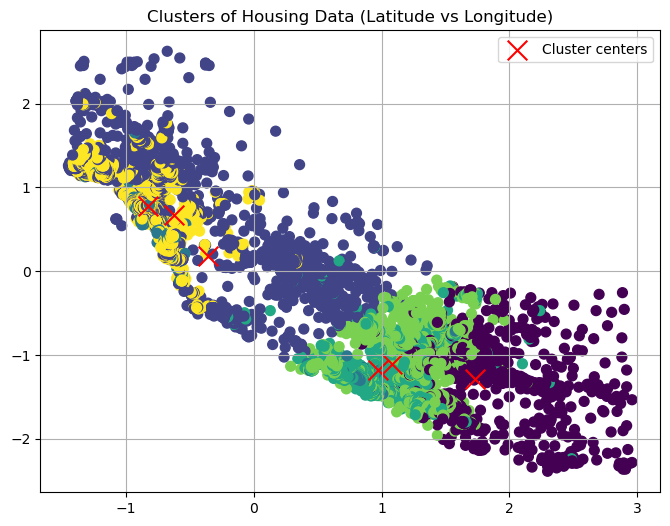

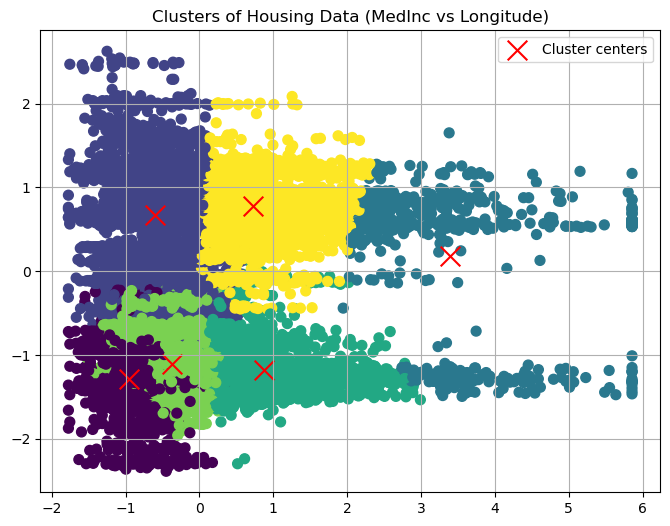

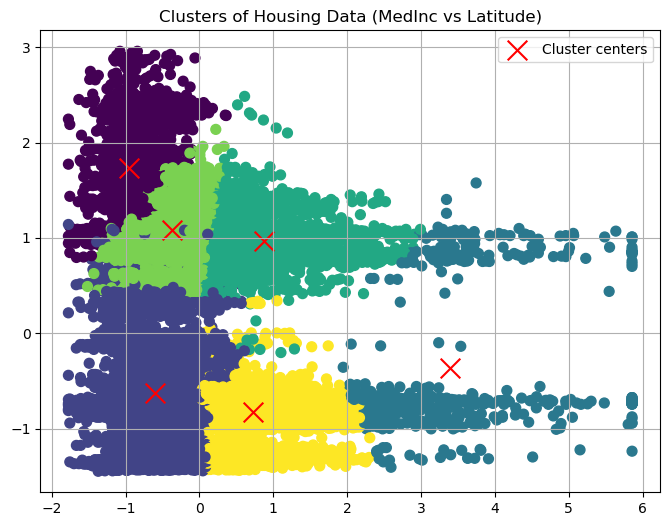

In [40]:
# Results with the whole dataset
Xnorm["Cluster"]                 = housing_model.predict(Xnorm)
dfHousing_processed["Cluster"]   = Xnorm["Cluster"]

## Cluster visualization (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(Xnorm['Latitude'], Xnorm['Longitude'], c=Xnorm['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 1], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (Latitude vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(Xnorm['MedInc'], Xnorm['Longitude'], c=Xnorm['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 2], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Longitude)')
plt.grid()
plt.show()

## Cluster visualization (MedInc vs Latitude)
plt.figure(figsize=(8, 6))
plt.scatter(Xnorm['MedInc'], Xnorm['Latitude'], c=Xnorm['Cluster'], s=50, cmap='viridis')
plt.scatter(housing_model.cluster_centers_[:, 0], housing_model.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster centers')
plt.legend()
plt.title('Clusters of Housing Data (MedInc vs Latitude)')
plt.grid()
plt.show()

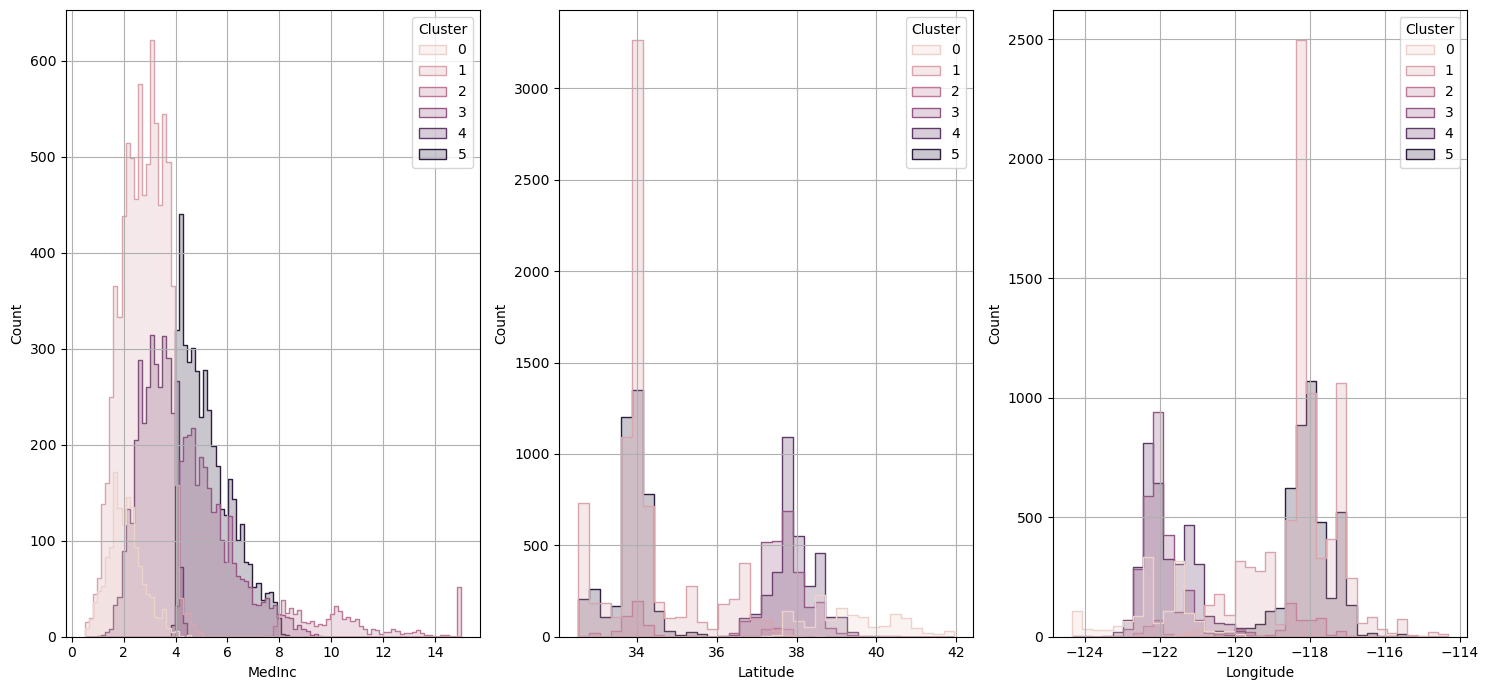

In [ ]:
## Histograms per cluster
fig, ax = plt.subplots(1,3,figsize=(15, 7))
sn.histplot(dfHousing_processed, x="MedInc", hue="Cluster", element="step",ax=ax[0])
ax[0].grid()
sn.histplot(dfHousing_processed, x="Latitude", hue="Cluster", element="step",ax=ax[1])
ax[1].grid()
sn.histplot(dfHousing_processed, x="Longitude", hue="Cluster", element="step",ax=ax[2])
ax[2].grid()
plt.tight_layout()
plt.show()

In [ ]:
# Get silhouette scores
silhouette_avg_train = silhouette_score(X_train.drop("Cluster", axis=1), ypred_train)
print(f'Silhouette Score for the model with train data: {silhouette_avg_train}')
silhouette_avg_test = silhouette_score(X_test.drop("Cluster", axis=1), ypred_test)
print(f'Silhouette Score for the model with test data: {silhouette_avg_test}')

Silhouette Score for the model: 0.37257659446754465
Silhouette Score for the model: 0.3722838603495996


The K-means classification model has a weak structure with a silhouette score of ~0.37, which is not too far from the decision boundary. Silhouette scores in this range suggest that the clusters are overlapping or that the algorithm has not found a very distinct separation. The structure might be artificial or simply represent general trends rather than distinct, tight groups. However, the model seems to perform relatively well and consistently with new unseen data points, preservin the silhouette score

In [51]:
## Save the model
dump(housing_model, open("housing_model_k_means_cluster.sav", "wb"))